# Time series analysis 

In [1]:
#Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
plt.style.use('fivethirtyeight')
%matplotlib inline



In [30]:
#Load the data
df=pd.read_csv('salesdaily.csv')

#set data as index
df=df.set_index('datum')
df.index=pd.to_datetime(df.index)

In [31]:
df.shape

(2106, 12)

In [32]:
df

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
2014-01-03,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2014-01-04,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
2014-01-05,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
2014-01-06,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday


In [33]:
df.info()
#We have no Na's

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


In [34]:
df1=df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

In [2]:
#Correlation:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'M01AB'),
  Text(0, 1.5, 'M01AE'),
  Text(0, 2.5, 'N02BA'),
  Text(0, 3.5, 'N02BE'),
  Text(0, 4.5, 'N05B'),
  Text(0, 5.5, 'N05C'),
  Text(0, 6.5, 'R03'),
  Text(0, 7.5, 'R06')])

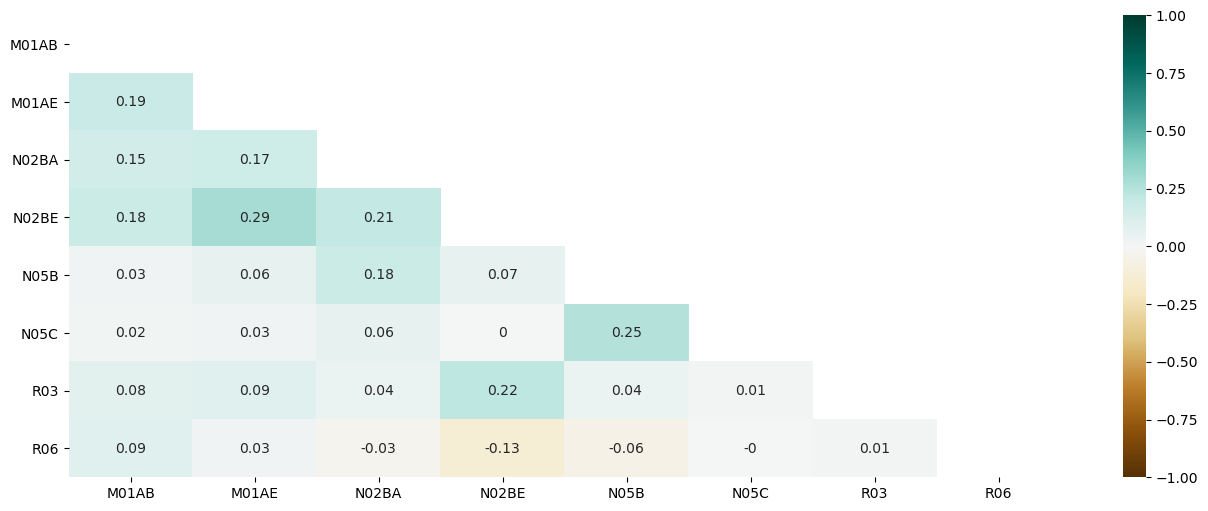

In [76]:
plt.figure(figsize=(16, 6))
plt.style.use('default')

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(np.round(df1.corr(), 2), dtype=np.bool))
heatmap = sns.heatmap(np.round(df1.corr(), 2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation=0)

In [7]:
columns=df1.columns

In [8]:
#Descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
M01AB,2106.0,5.033683,2.737579,0.0,3.00,4.99,6.670,17.340000
M01AE,2106.0,3.895830,2.133337,0.0,2.34,3.67,5.138,14.463000
N02BA,2106.0,3.880441,2.384010,0.0,2.00,3.50,5.200,16.000000
N02BE,2106.0,29.917095,15.590966,0.0,19.00,26.90,38.300,161.000000
N05B,2106.0,8.853627,5.605605,0.0,5.00,8.00,12.000,54.833333
N05C,2106.0,0.593522,1.092988,0.0,0.00,0.00,1.000,9.000000
R03,2106.0,5.512262,6.428736,0.0,1.00,4.00,8.000,45.000000
R06,2106.0,2.900198,2.415816,0.0,1.00,2.00,4.000,15.000000


### Time Series Analysis and Visualization

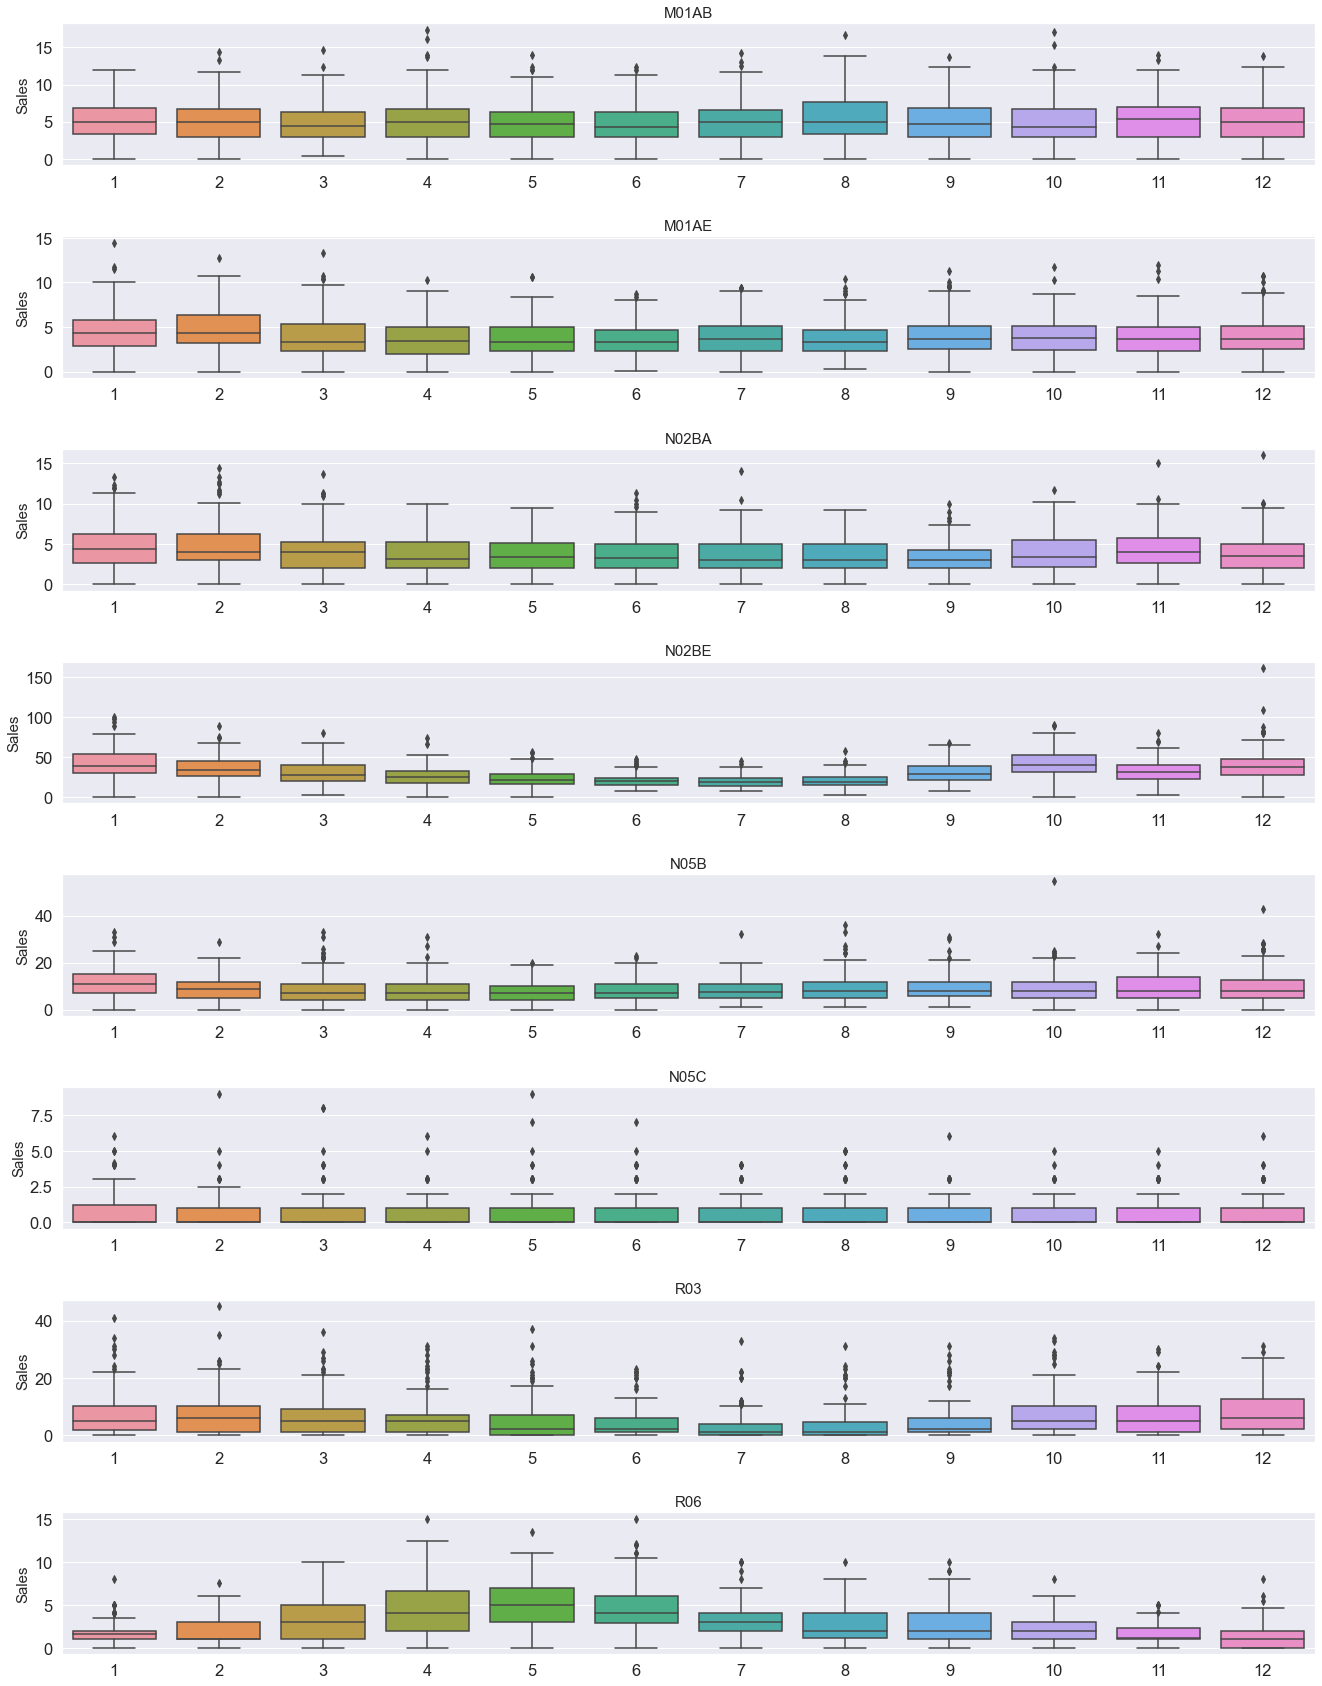

In [18]:
#Pharma sales by Month

sns.set(font_scale = 1.5)
fig, axes = plt.subplots(8,1, figsize=(20, 30), sharex=False)
fig.subplots_adjust(hspace=.5)

for name, ax in zip(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('Sales', fontsize=15)
    ax.set_xlabel('')
    ax.set_title(name, fontsize=15)



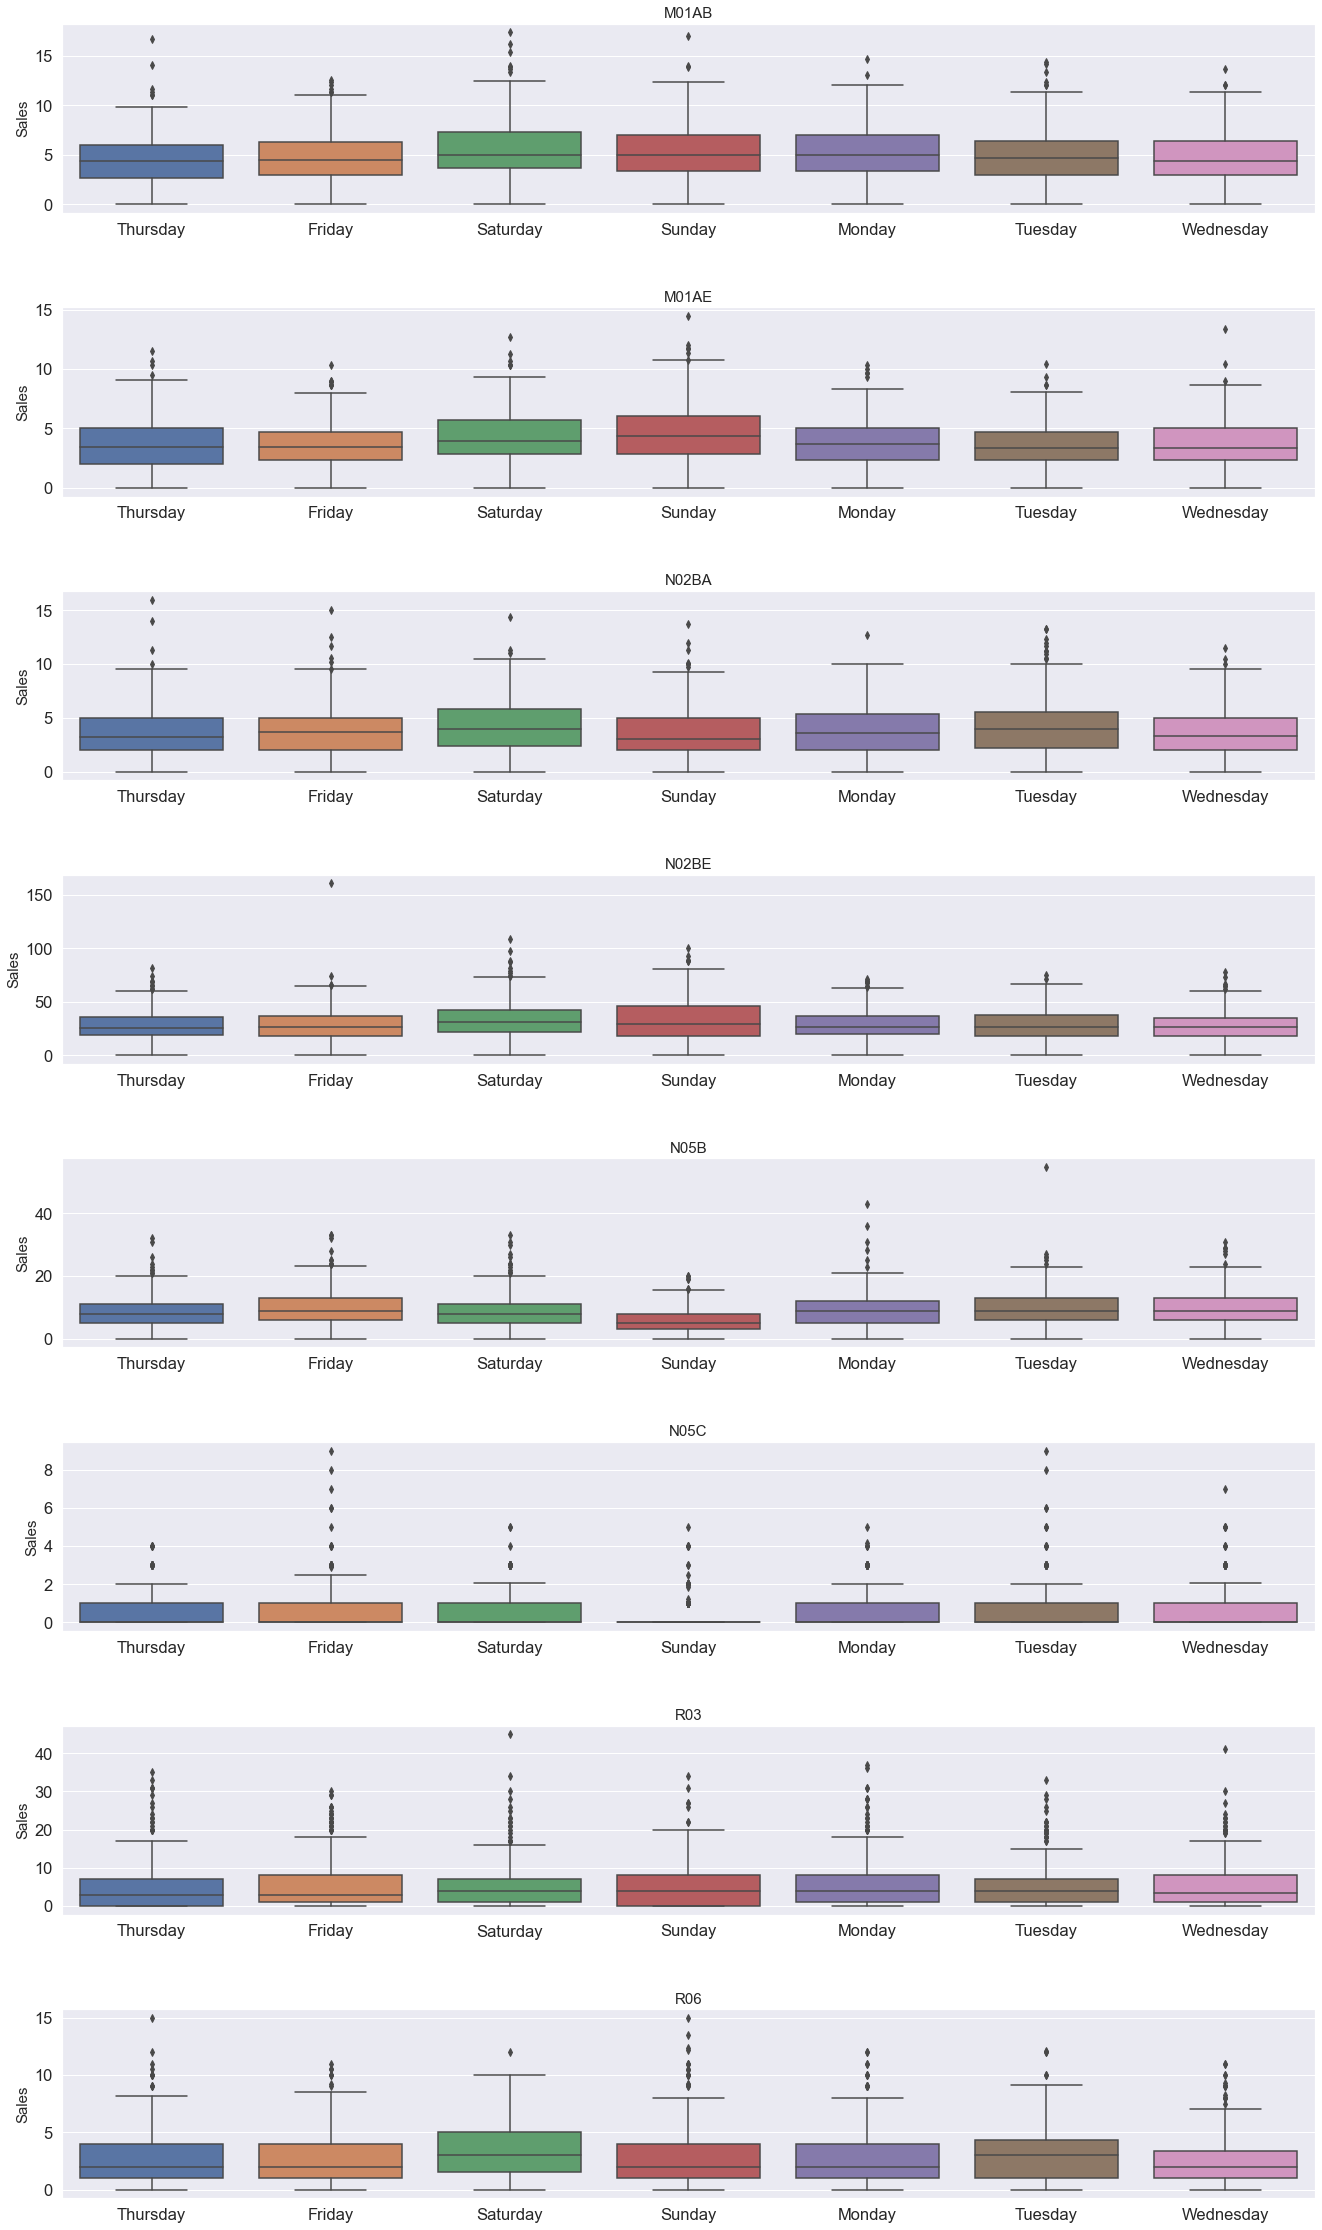

In [48]:
#Pharma sales by Weekday

sns.set(font_scale = 1.5)
fig, axes = plt.subplots(8,1, figsize=(20, 40), sharex=False)
fig.subplots_adjust(hspace=.5)

for name, ax in zip(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], axes):
    sns.boxplot(data=df, x='Weekday Name', y=name, ax=ax)
    ax.set_ylabel('Sales', fontsize=15)
    ax.set_xlabel('')
    ax.set_title(name, fontsize=15)



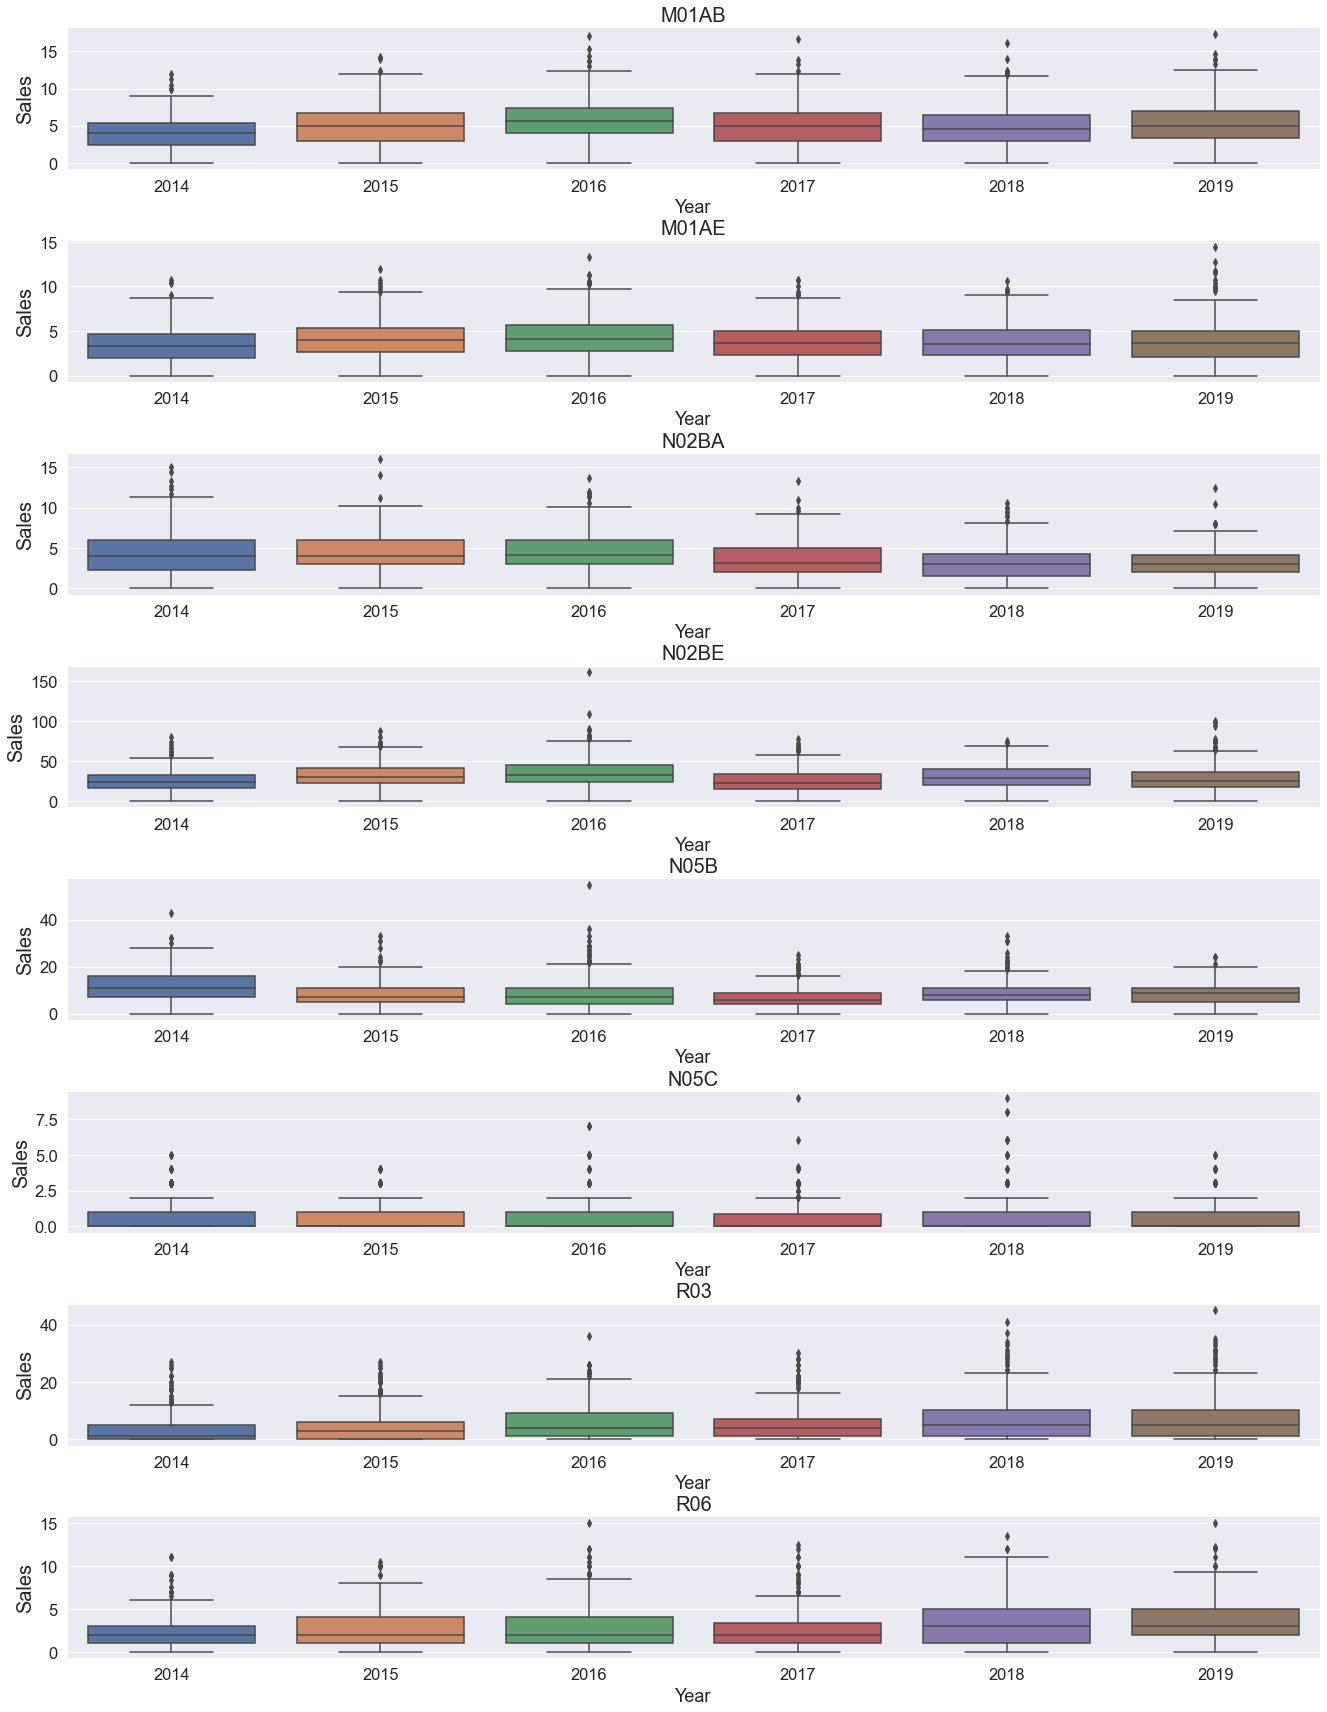

In [11]:
#Pharma sales by Year
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(8, 1, figsize=(20, 30), sharex=False)
fig.subplots_adjust(hspace=.5)

for name, ax in zip(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], axes):
    sns.boxplot(data=df, x='Year', y=name, ax=ax)
    ax.set_ylabel('Sales', fontsize=20)
    ax.set_title(name, fontsize=20)


### Data Distribution

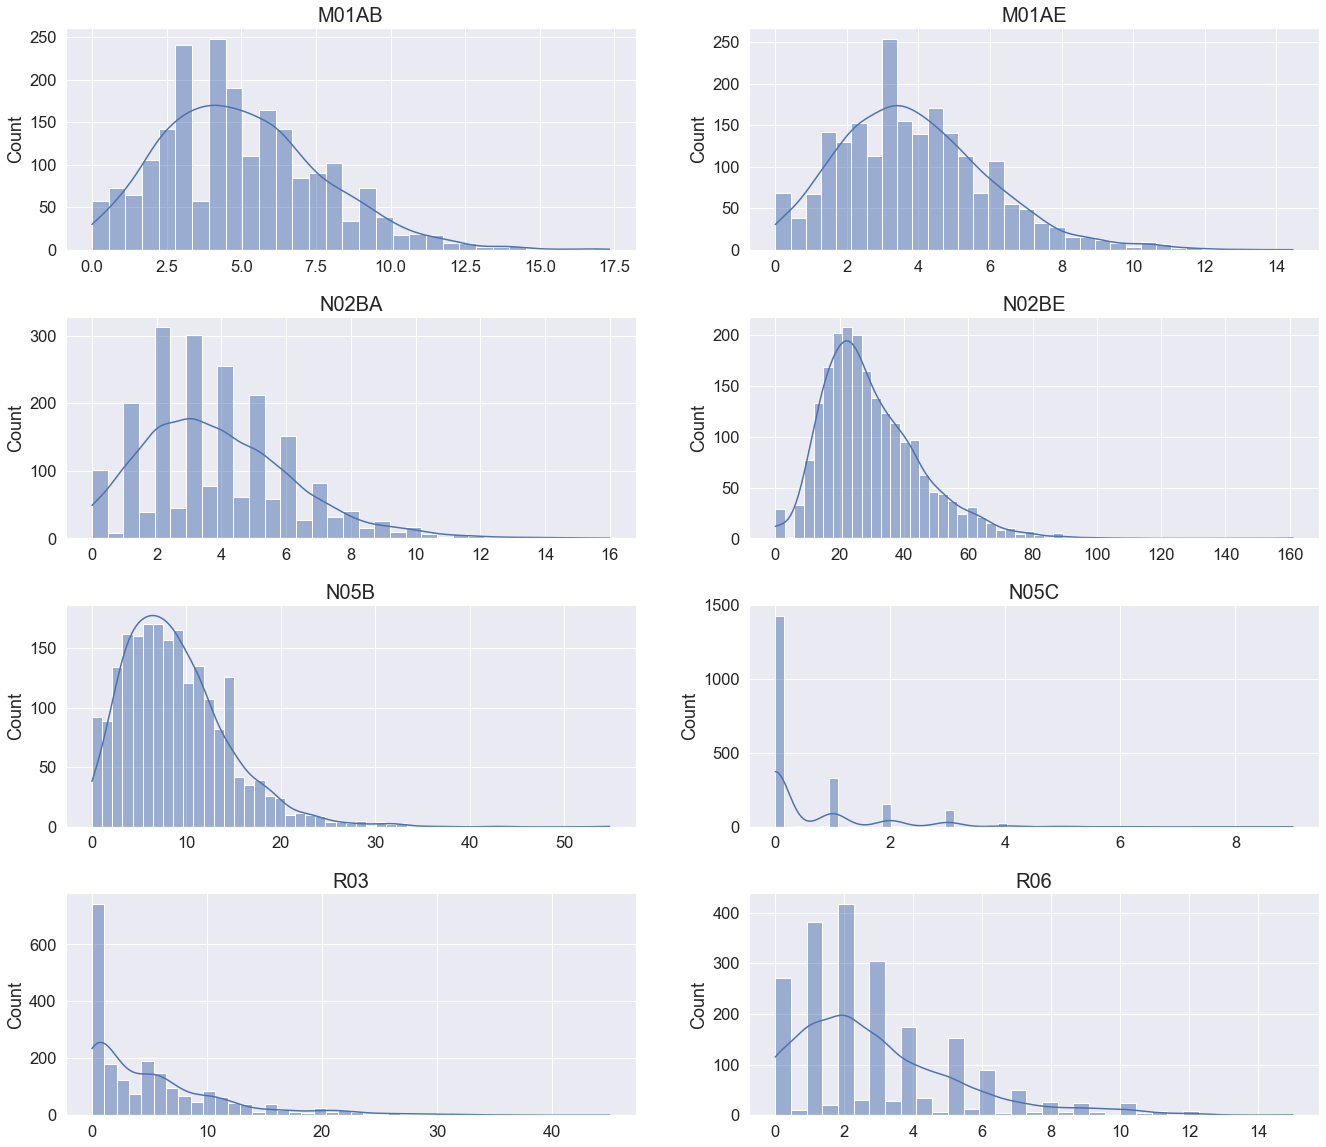


Kurtosis of M01AB: 0.5857871992024508
Skewness of M01AB: 0.6418549366043688

Kurtosis of M01AE: 0.886860845795546
Skewness of M01AE: 0.7178656250496186

Kurtosis of N02BA: 1.1818860536256715
Skewness of N02BA: 0.8488914773599189

Kurtosis of N02BE: 3.408022631048392
Skewness of N02BE: 1.201434799978038

Kurtosis of N05B: 4.0104956075714995
Skewness of N05B: 1.323896599425189

Kurtosis of N05C: 8.739432743846576
Skewness of N05C: 2.518672299176973

Kurtosis of R03: 4.003130613934461
Skewness of R03: 1.828442746423343

Kurtosis of R06: 1.9818425942222495
Skewness of R06: 1.2918922466748677


In [21]:

rcParams['figure.figsize'] = 14, 6
fig, axes = plt.subplots(4, 2, figsize=(20, 20),  sharey=False, sharex=False)
fig.subplots_adjust(hspace=.3)

for name, ax in zip(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], axes.flat):
    sns.histplot(df[name], kde=True, ax=ax)
    ax.set_title(name, fontsize=20)
    ax.set_xlabel('')
plt.show()


#Kurtosis and Skewness coefficients
for name in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    print( '\nKurtosis of {}: {}'.format(name, stats.kurtosis(df[name])))
    print( 'Skewness of {}: {}'.format(name, stats.skew(df[name])))



In [110]:
#Normality Test

for i in df1.columns:
    #Tests the normality of the series
    print("\n\nNormality test for".upper(), i, ":")
    stat, p = stats.normaltest(df.N05B)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    
    
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    
    else:
        print('Data does not look Gaussian (reject H0)')



NORMALITY TEST FOR M01AB :
Statistics=575.024, p=0.000
Data does not look Gaussian (reject H0)

Normality test for log( M01AB ):
Statistics=235.101, p=0.000
Data still does not look Gaussian (reject H0)


NORMALITY TEST FOR M01AE :
Statistics=575.024, p=0.000
Data does not look Gaussian (reject H0)

Normality test for log( M01AE ):
Statistics=170.767, p=0.000
Data still does not look Gaussian (reject H0)


NORMALITY TEST FOR N02BA :
Statistics=575.024, p=0.000
Data does not look Gaussian (reject H0)

Normality test for log( N02BA ):
Statistics=139.763, p=0.000
Data still does not look Gaussian (reject H0)


NORMALITY TEST FOR N02BE :
Statistics=575.024, p=0.000
Data does not look Gaussian (reject H0)

Normality test for log( N02BE ):
Statistics=958.923, p=0.000
Data still does not look Gaussian (reject H0)


NORMALITY TEST FOR N05B :
Statistics=575.024, p=0.000
Data does not look Gaussian (reject H0)

Normality test for log( N05B ):
Statistics=241.352, p=0.000
Data still does not loo

### Rolling 
"Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data"

In [23]:
#7days
df1_7d_rol = df1[columns].rolling(window = 7, center = True).mean() 

#30days
df1_30d_rol = df1[columns].rolling(window = 30, center = True).mean() 

#1year
data_365d_rol = df1[columns].rolling(window = 365, center = True).mean()

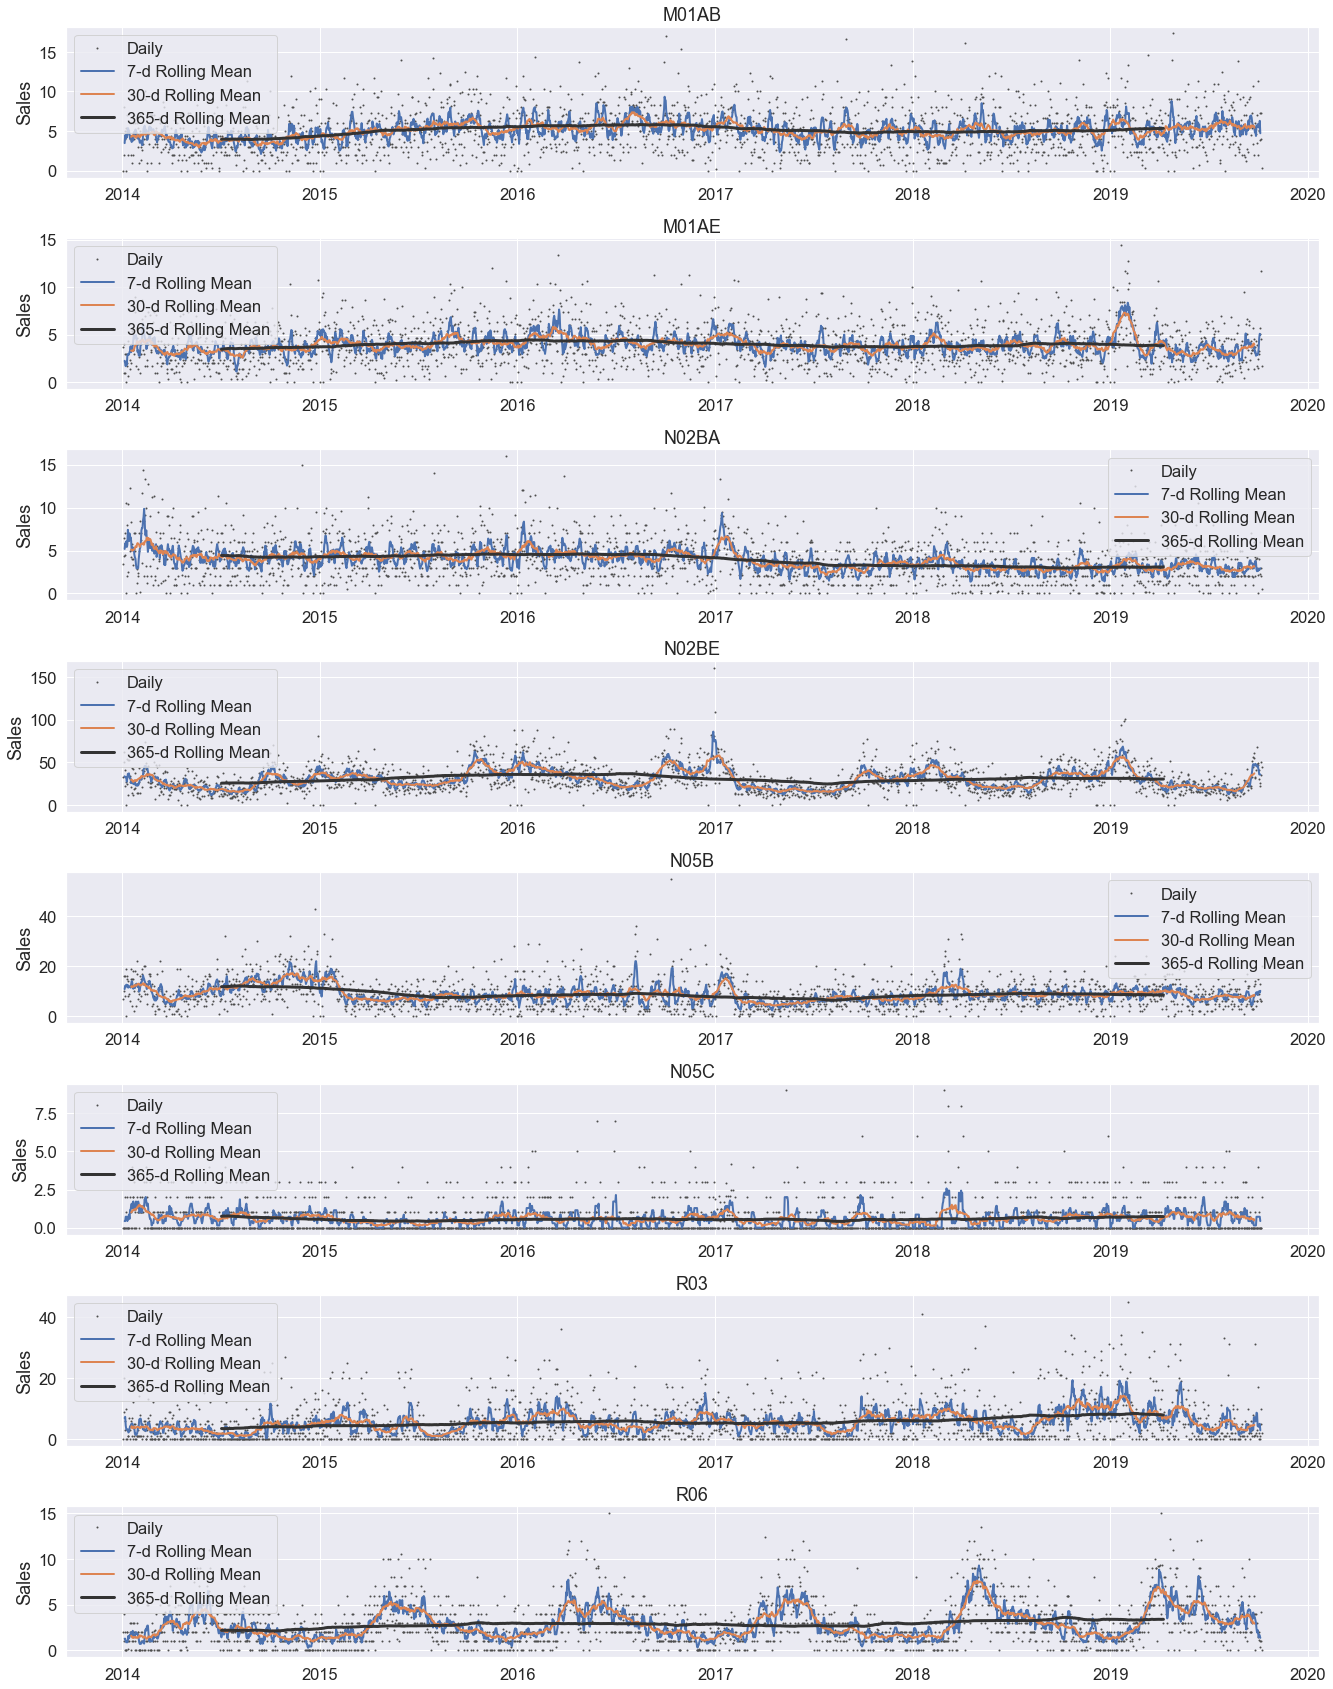

In [28]:
fig, axes = plt.subplots(8, 1, figsize = (20,30),  sharey=False, sharex=False)
fig.subplots_adjust(hspace=.4)

for name, ax in zip(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], axes.flat):
    
    # plotting daily data
    ax.plot(df1[name], marker='.', markersize=2, color='0.3',linestyle='None', label='Daily')
    
    # plotting 7-day rolling data
    ax.plot(df1_7d_rol[name], linewidth=2, label='7-d Rolling Mean')
    
    #plotting monthly rolling data
    ax.plot(df1_30d_rol[name], linewidth=2, label='30-d Rolling Mean')
    
    # plotting annual rolling data
    ax.plot(data_365d_rol[name], color='0.2', linewidth=3, label='365-d Rolling Mean')
    
    # Beautification of plot
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('')
    ax.set_ylabel('Sales'. format(name))
    ax.set_title('{}'.format(name))
